In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from tensorflow import keras

In [2]:
# The models I am going to be trying it out and see which performs best on the Zalando Fashion MNIST Data set.

# Linear Models: if we assume that the data points can be linearly differentiated
# Logistic Regression, Support Vector Machines.

# Non-Linear Models:
# K-Nearest Neighbours, Kernel SVM, Naïve Bayes, Decision Tree Classification, Random Forest Classification
# Neural Network CNN and RNN.

# The model will have 10 Binary Classifiers, so for each class or type of clothing I will have a Binary classifier that is going to output (Class N or not-Class N) or a probability for each class.
# Each Binary Classifier is going to be OneVsAll, not OneVsOne.

# Evaluation of Classification Model:
# Loss function: Log Loss or Cross-Entropy Loss: 
# We want to minimize the loss value so that the prediction of classification are very accurate

# It is used for evaluating the performance of a classifier, whose output is a probability value between the 0 and 1.
# For a good binary Classification model, the value of log loss should be near to 0.
# The value of log loss increases if the predicted value deviates from the actual value.
# The lower log loss represents the higher accuracy of the model.

# SoftMax activation function to be used in output layer for neural network.
# For a multi-class classification problem, a Multinomial probability is used. This is achieved using a network with one node for each class in the output layer and the sum of the predicted probabilities equals one.
# A neural network model requires an activation function in the output layer of the model to make the prediction.

# At the end Combine your models via Ensemble models, as together they will predict better than separately.

Loading the Zalando MNIST dataset

In [3]:
df = pd.read_csv("fashion-mnist_train.csv")
df_test = pd.read_csv("fashion-mnist_test.csv")

In [4]:
X_train, y_train = df.iloc[:, 1:], df['label']

In [5]:
# Labels and Respective Class Name.
classes = sorted(y_train.unique())
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# finding where class = 0
example_classes_images = []

def produce_dict(data_X, data_y, classes, class_names):
    for num in classes:
        y_num = (data_y == num)
        X_num = data_X.loc[y_num].values[0:3]
        example_classes_images.append(X_num)
        
produce_dict(X_train, y_train, classes, class_names)

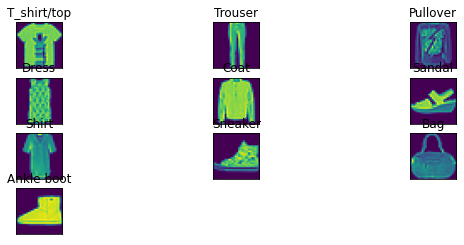

In [8]:
# Get representation picture for each class and match it with class_names in the array, check if they match.
# 3 images for each class.
plt.figure(figsize=(10, 10))
for i in range(len(example_classes_images)):
    for j in range(len(example_classes_images[i])):
        plt.subplot(10, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(example_classes_images[i][j].reshape((28,28)))
        plt.title(class_names[i])
plt.show()

In [9]:
# Scalling the X-input features.
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
])

In [10]:
X_train_scaled = num_pipeline.fit_transform(X_train)

## Linear Models: Logistic Regression and SVM

In [11]:
# Logistic Regression model
# Log Reg model is used with Binary classes i.e. only for two classes, but in a dataset we have 10 classes, so hence we need to build 10 Binary classifiers with OneVsRest model.
# Classification models either have predict_proba or decision_function to provide score/probability for each class 
log_reg_model = LogisticRegression()
one_vs_rest_log_reg_model = OneVsRestClassifier(log_reg_model)

In [12]:
# fitting the OVR Log Reg model
one_vs_rest_log_reg_model.fit(X_train, y_train)

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

OneVsRestClassifier(estimator=LogisticRegression())

In [16]:
# Classes that the Log Reg has identified.
one_vs_rest_log_reg_model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [211]:
# Viewing the prediction output of the model.
X_test_mock = X_train[100:105]
y_pred_mock = one_vs_rest_log_reg_model.predict(X_test_mock)

In [213]:
# model produces a class label for each inputted row, hence 5 rows = 5 labels. 
y_pred_mock

array([8, 5, 0, 5, 3])

In [214]:
# To view predict probability for each class and display it for each input row, then use predict_proba()
y_pred_mock_prob = one_vs_rest_log_reg_model.predict_proba(X_test_mock)
y_pred_mock_prob.round(1)

array([[0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0.9, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ],
       [0.5, 0. , 0.4, 0. , 0. , 0. , 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [155]:
# Cross Validating the results with Validation set.
log_reg_scores = cross_val_score(one_vs_rest_log_reg_model, X_train, y_train, cv=5, scoring="accuracy")

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [27]:
def accuracy_score_model(scores):
    print(f"Values: {scores}")
    print(f"Average score in percentage: {scores.mean() * 100}%")
    print(f"Standard Deviation in percentage: {((np.std(scores) / scores.mean()) * 100).round(2)}%")

In [174]:
# View Confusion Matrix on how well the model predicted for each class.
# To see where there are false positives and false negatives
# To be able to see for which classes we need to improve, i.e. get more data images for classes that we are classifying poorly with.
y_train_pred = cross_val_predict(one_vs_rest_log_reg_model, X_train, y_train, cv=3)

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.

In [183]:
conf_matrix = confusion_matrix(y_train, y_train_pred, labels=classes)
conf_matrix

array([[4868,   47,  120,  296,   42,    4,  521,    2,   99,    1],
       [  19, 5772,   32,  128,   19,    0,   20,    1,    9,    0],
       [ 106,   16, 4492,   58,  842,    1,  421,    0,   64,    0],
       [ 189,  118,   71, 5189,  245,    0,  153,    0,   31,    4],
       [  14,   24,  536,  234, 4689,    0,  466,    0,   37,    0],
       [   8,   11,    8,    9,    2, 5338,    6,  306,   90,  222],
       [ 880,   41,  709,  224,  661,    1, 3319,    0,  163,    2],
       [   0,    0,    0,    0,    0,  165,    0, 5596,   20,  219],
       [  23,    8,   39,   67,   42,   50,   95,   24, 5643,    9],
       [   2,    3,    1,    3,    0,  105,    2,  218,    7, 5659]])

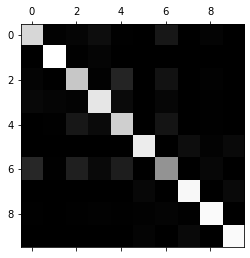

In [184]:
# Remember that rows represent actual classes, while columns represent predicted classes
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

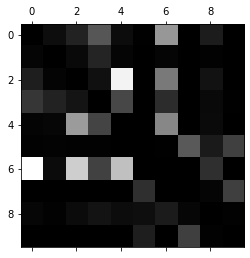

In [185]:
# Lets see which specifically classes my classifier does not predict well.
# Focusing more in detail on each class errors.

# As we can see by the white spots, this is where misclassfications happen, i.e. false positives.
# We can see that class predicted 0 incorrectly predicts for actual class 6, so a lot of images are predicted as class 0, but actually are class 6.
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = conf_matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [188]:
# Actual class
class_names[6]

'Shirt'

In [189]:
# Predicted class. As we can see that they are very similar pieces of clothing hence why it predicts it badly. Further feature engineering is required to help classifier to correctly classify that.
class_names[0]

'T_shirt/top'

## Support Vector Machines

In [73]:
# Support Vector Machines
# Linear SVC automatically changes to OneVsRest for MultiClass output.
lin_svc = LinearSVC(multi_class="ovr")
lin_svc.fit(X_train_scaled, y_train)

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
# Cross Validating the results with Validation set.
lin_svc_scores = cross_val_score(lin_svc, X_train_scaled, y_train, cv=5, scoring="accuracy")

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
accuracy_score_model(lin_svc_scores)

## Neural Network

In [17]:
# Reshaping the X_train_scaled data into a (batch_size, 28, 28)
# As neural network requires the X input data to be in 3 dimensional form

X_train_reshaped = X_train_scaled.reshape(-1, 28, 28)

In [16]:
# Split the data into a train and validation set
splits = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splits.split(X_train, y_train):
    strat_X_train = X_train.loc[train_index]
    strat_y_train = y_train.loc[train_index]
    strat_X_test = X_train.loc[test_index]
    strat_y_test = y_train.loc[test_index]

In [17]:
strat_X_train_scaled = num_pipeline.fit_transform(strat_X_train)
strat_X_test_scaled = num_pipeline.transform(strat_X_test)

In [20]:
strat_X_train_scaled_reshaped = strat_X_train_scaled.reshape(-1,28,28)
strat_X_test_scaled_reshaped = strat_X_test_scaled.reshape(-1,28,28)

In [65]:
# Wrapping the model in Keras Wrapper in order to be compatible with other estimators of scikit-learn
from scikeras.wrappers import KerasClassifier


In [66]:
def get_model():
    ann_model = keras.models.Sequential()
    ann_model.add(keras.layers.Flatten(input_shape=[28, 28]))
    ann_model.add(keras.layers.Dense(300, activation="relu"))
    ann_model.add(keras.layers.Dense(100, activation="relu"))
    ann_model.add(keras.layers.Dense(10, activation="softmax"))
    ann_model.compile(loss ='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001),metrics =['accuracy'])
    
    return ann_model

In [67]:
Kmodel = KerasClassifier(build_fn=get_model, verbose=1)


In [52]:
# The last layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

# Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.Here we will use "sparse_categorical_crossentropy"
# Optimizer —This is how the model is updated based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [68]:
# Training the model
history = Kmodel.fit(strat_X_train_scaled_reshaped, strat_y_train, epochs=5, validation_data=(strat_X_test_scaled_reshaped, strat_y_test))

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4548 - accuracy: 0.8368 - val_loss: 0.3704 - val_accuracy: 0.8646
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3419 - accuracy: 0.8742 - val_loss: 0.3696 - val_accuracy: 0.8668
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3057 - accuracy: 0.8865 - val_loss: 0.3474 - val_accuracy: 0.8722
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2773 - accuracy: 0.8967 - val_loss: 0.3263 - val_accuracy: 0.8843
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2528 - accuracy: 0.9051 - val_loss: 0.3375 - val_accuracy: 0.8827


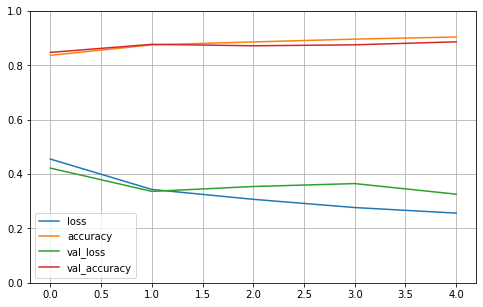

In [59]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [60]:
val_accuracy = np.array(history.history['val_accuracy'])
accuracy_score_model(val_accuracy)

Values: [0.84766668 0.87733334 0.87199998 0.87558335 0.88658333]
Average score in percentage: 87.1833336353302%
Standard Deviation in percentage: 1.49%


## Random Forest using xgboost

In [18]:
# XGboosting Decision Trees
from xgboost import XGBClassifier

In [19]:
xgb = XGBClassifier(max_depth=10,n_estimators=50, objective="multi:softmax", eval_metric="mlogloss")

In [20]:
xgb.fit(strat_X_train_scaled, strat_y_train, eval_set=[(strat_X_test_scaled, strat_y_test)])

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.35997
[1]	validation_0-mlogloss:1.06675
[2]	validation_0-mlogloss:0.88046
[3]	validation_0-mlogloss:0.75000
[4]	validation_0-mlogloss:0.65408
[5]	validation_0-mlogloss:0.58181
[6]	validation_0-mlogloss:0.52675
[7]	validation_0-mlogloss:0.48459
[8]	validation_0-mlogloss:0.45166
[9]	validation_0-mlogloss:0.42492
[10]	validation_0-mlogloss:0.40394
[11]	validation_0-mlogloss:0.38743
[12]	validation_0-mlogloss:0.37348
[13]	validation_0-mlogloss:0.36229
[14]	validation_0-mlogloss:0.35251
[15]	validation_0-mlogloss:0.34388
[16]	validation_0-mlogloss:0.33748
[17]	validation_0-mlogloss:0.33220
[18]	validation_0-mlogloss:0.32868
[19]	validation_0-mlogloss:0.32455
[20]	validation_0-mlogloss:0.32084
[21]	validation_0-mlogloss:0.31813
[22]	validation_0-mlogloss:0.31570
[23]	validation_0-mlogloss:0.31290
[24]	validation_0-mlogloss:0.31089
[25]	validation_0-mlogloss:0.30928
[26]	validation_0-mlogloss:0.30841
[27]	validation_0-mlogloss:0.30682
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [21]:
y_pred = xgb.predict(strat_X_test)

In [22]:
# Accuracy score of XGBoost Classifier is only 16.8% which is quite poor. 
accuracy_score(strat_y_test, y_pred)

0.1685

## Ensemble Model. Aggregating 3 classifiers predictions and majority vote class.

In [23]:
from sklearn.ensemble import VotingClassifier

In [24]:
vot_clf = VotingClassifier([
    ("xgboost", xgb),
    ("log_reg", one_vs_rest_log_reg_model),
], voting="soft")

In [ ]:
vot_clf.fit(X_train_scaled, y_train)

/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/nikitaizmailov/opt/anaconda3/envs/ds_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [ ]:
## Accuracy Score of Voting Classifier
y_pred_vot_clf = vot_clf.predict(strat_X)

accuracy_score(strat_y_test, y_pred_vot_clf)